In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
data=df.copy()
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [3]:
print(f"Dataset shape: {data.shape}")

print("\n Dataset Information: ")
data.info()

Dataset shape: (5110, 12)

 Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
#check for any duplicate data
data.duplicated().sum()

0

In [5]:
print("\n Statistics of Data: ")
print(data.describe())


 Statistics of Data: 
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.09

**DATA PREPROCESSING**

In [6]:
print("\n missing values per column: ")
missing_values=data.isna().sum()
print(missing_values)


 missing values per column: 
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


missing values plot: 



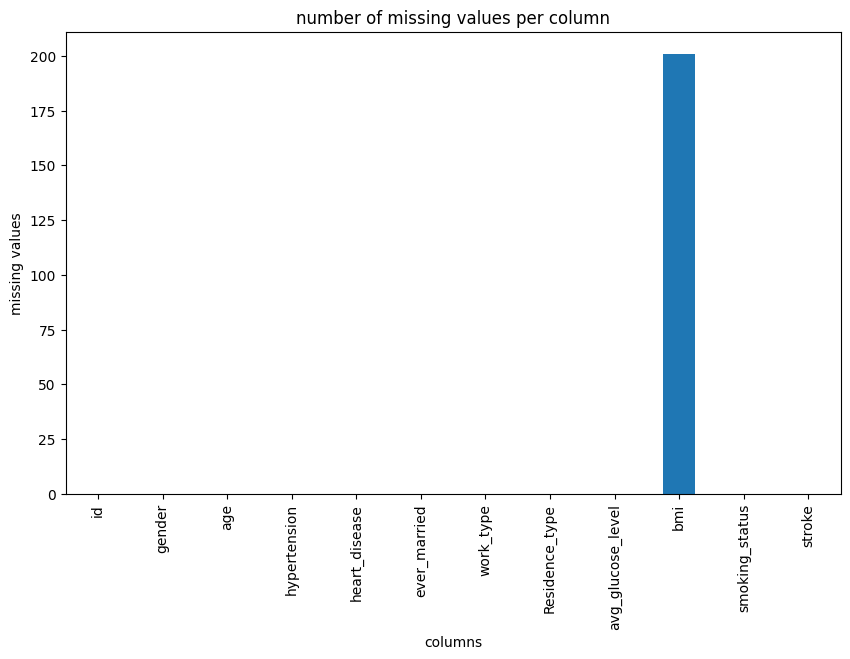

In [7]:
print("missing values plot: \n")
plt.figure(figsize=(10,6))
missing_values.plot(kind='bar')
plt.title('number of missing values per column')
plt.xlabel('columns')
plt.ylabel('missing values')
plt.xticks(rotation=90)
plt.show()

In [12]:
data.dropna(inplace=True)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [13]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
data['smoking_status'].value_counts()

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64

In [11]:
data['work_type'].value_counts()

work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64

In [15]:
data['Residence_type'].value_counts()

Residence_type
Urban    2490
Rural    2419
Name: count, dtype: int64

In [16]:
data['ever_married'].value_counts()

ever_married
Yes    3204
No     1705
Name: count, dtype: int64

**data cleaning**

In [17]:
# Drop rows where smoking_status is 'Unknown'
data = data.drop(data[data['smoking_status'] == 'Unknown'].index)

# Drop the 'id' column
data = data.drop('id', axis=1)

# Verify the changes
print("Dataset shape after dropping 'Unknown' smoking status and 'id' column:", data.shape)
print("\nUnique values in smoking_status:", data['smoking_status'].unique())

Dataset shape after dropping 'Unknown' smoking status and 'id' column: (3426, 11)

Unique values in smoking_status: ['formerly smoked' 'never smoked' 'smokes']


In [18]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


**age and stroke relation**

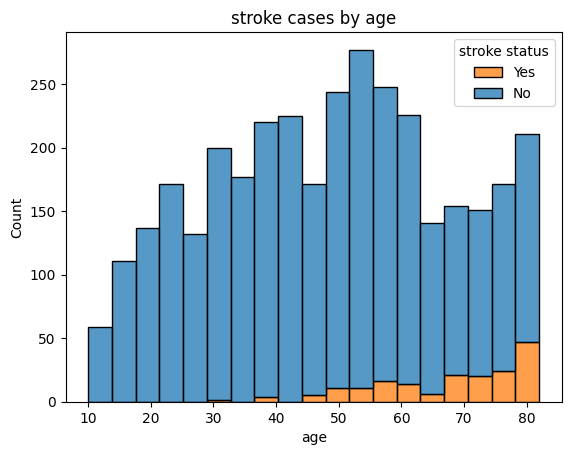

In [19]:
sns.histplot(data,x='age',hue='stroke',multiple='stack')
plt.title('stroke cases by age')
plt.legend(title='stroke status', labels=['Yes','No'])
plt.show()

In [20]:
stroke_count=data['stroke'].value_counts()
stroke_count

stroke
0    3246
1     180
Name: count, dtype: int64

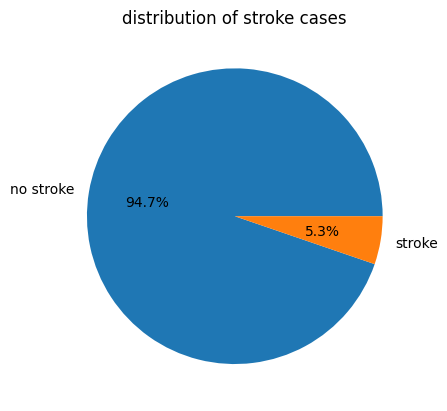

In [21]:
#presented in pie chart
stroke_count=[3246,180]
labels=('no stroke','stroke')
plt.pie(stroke_count,labels=labels,autopct='%1.1f%%')
plt.title('distribution of stroke cases')
plt.show()

**gender and stroke relation**

In [22]:
data['gender'].value_counts()

gender
Female    2086
Male      1339
Other        1
Name: count, dtype: int64

In [23]:
stroke_rate_gender=data.groupby('gender')['stroke'].mean()
stroke_rate_gender

gender
Female    0.050336
Male      0.056012
Other     0.000000
Name: stroke, dtype: float64

In [24]:
stroke_count_gender=stroke_rate_gender*data['gender'].value_counts()
stroke_count_gender

gender
Female    105.0
Male       75.0
Other       0.0
dtype: float64

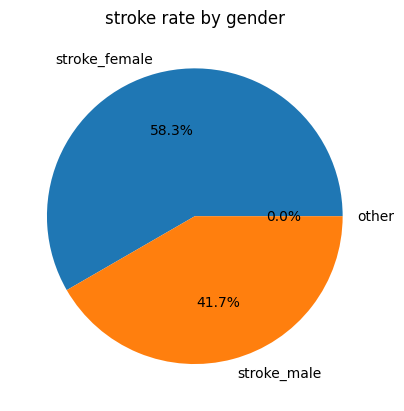

In [25]:
plt.pie(stroke_count_gender,labels=['stroke_female','stroke_male','other'],autopct='%1.1f%%')
plt.title('stroke rate by gender')
plt.show()

**smoking status and stroke relation**

In [26]:
data['smoking_status'].value_counts()

smoking_status
never smoked       1852
formerly smoked     837
smokes              737
Name: count, dtype: int64

In [27]:
stroke_rate_smoke=data.groupby('smoking_status')['stroke'].mean()
stroke_rate_smoke

smoking_status
formerly smoked    0.068100
never smoked       0.045356
smokes             0.052917
Name: stroke, dtype: float64

In [28]:
smoking_data={'smoking_status':['formerly smoked','never smoked','smokes'],
							'stroke_rate':[0.068100,0.045356,0.052917]}

In [29]:
smoke_stroke=pd.DataFrame(smoking_data)
smoke_stroke

,smoking_status,stroke_rate
0,formerly smoked,0.068100
1,never smoked,0.045356
2,smokes,0.052917


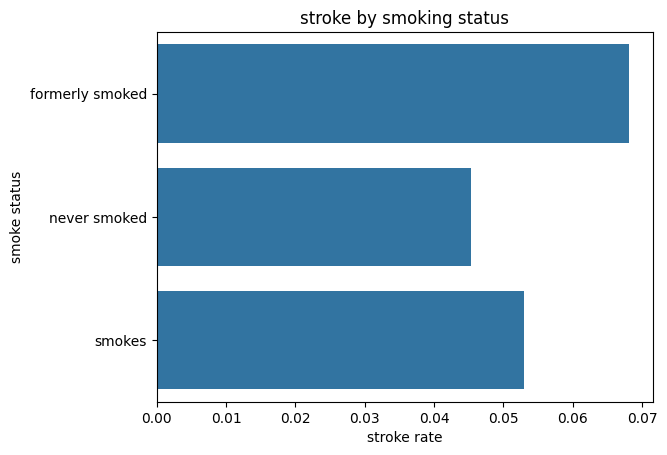

In [30]:
sns.barplot(data=smoke_stroke,y='smoking_status',x='stroke_rate')
plt.title('stroke by smoking status')
plt.xlabel('stroke rate')
plt.ylabel('smoke status')
plt.show()

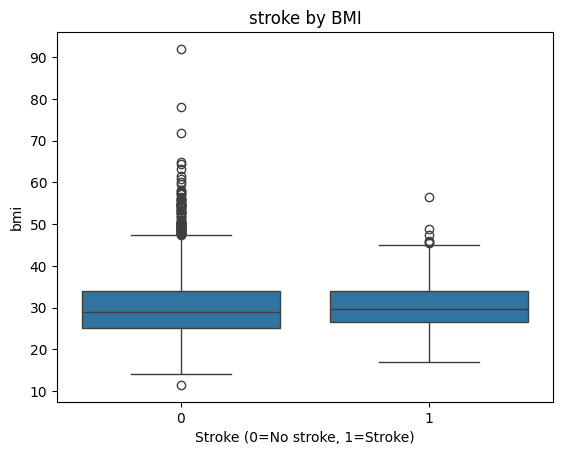

In [31]:
#is there a relationship between BMI and stroke
sns.boxplot(x='stroke',y='bmi',data=data)
plt.title('stroke by BMI')
plt.xlabel('Stroke (0=No stroke, 1=Stroke)')
plt.ylabel('bmi')
plt.show()
#this is to show outliers. there are outliers in stroke wrt bmi so it is not a risk factor for stroke

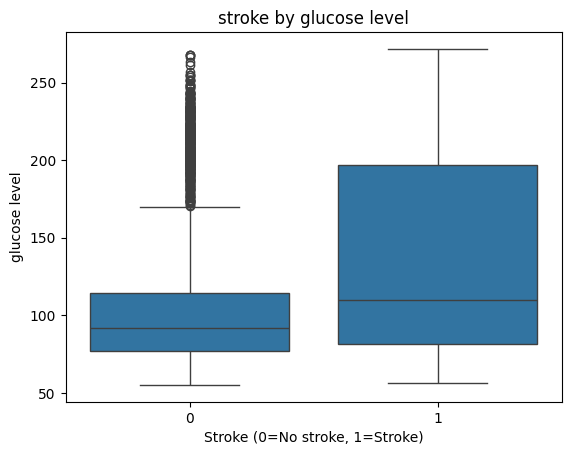

In [32]:
sns.boxplot(x='stroke',y='avg_glucose_level',data=data)
plt.title('stroke by glucose level')
plt.xlabel('Stroke (0=No stroke, 1=Stroke)')
plt.ylabel('glucose level')
plt.show()
#outliers are there in no stroke(can be ignored). so basically as glucose level increases, chances of getting stroke also increases.
#in box plot focus on the stroke cases.

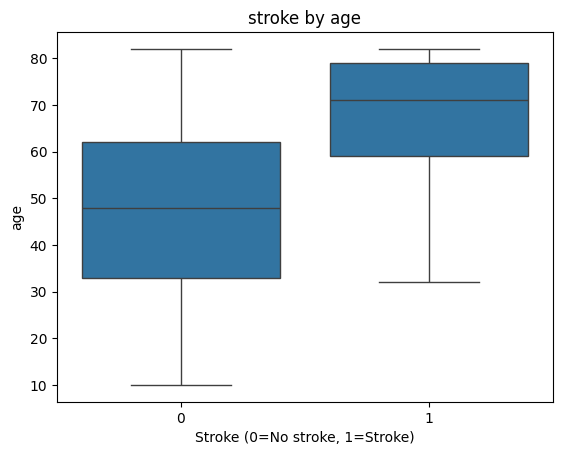

In [33]:
sns.boxplot(x='stroke',y='age',data=data)
plt.title('stroke by age')
plt.xlabel('Stroke (0=No stroke, 1=Stroke)')
plt.ylabel('age')
plt.show()
#there are no outliers wrt age.

In [34]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols)
#categorical columns are encoded using one hot encoding.

Categorical Columns: Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


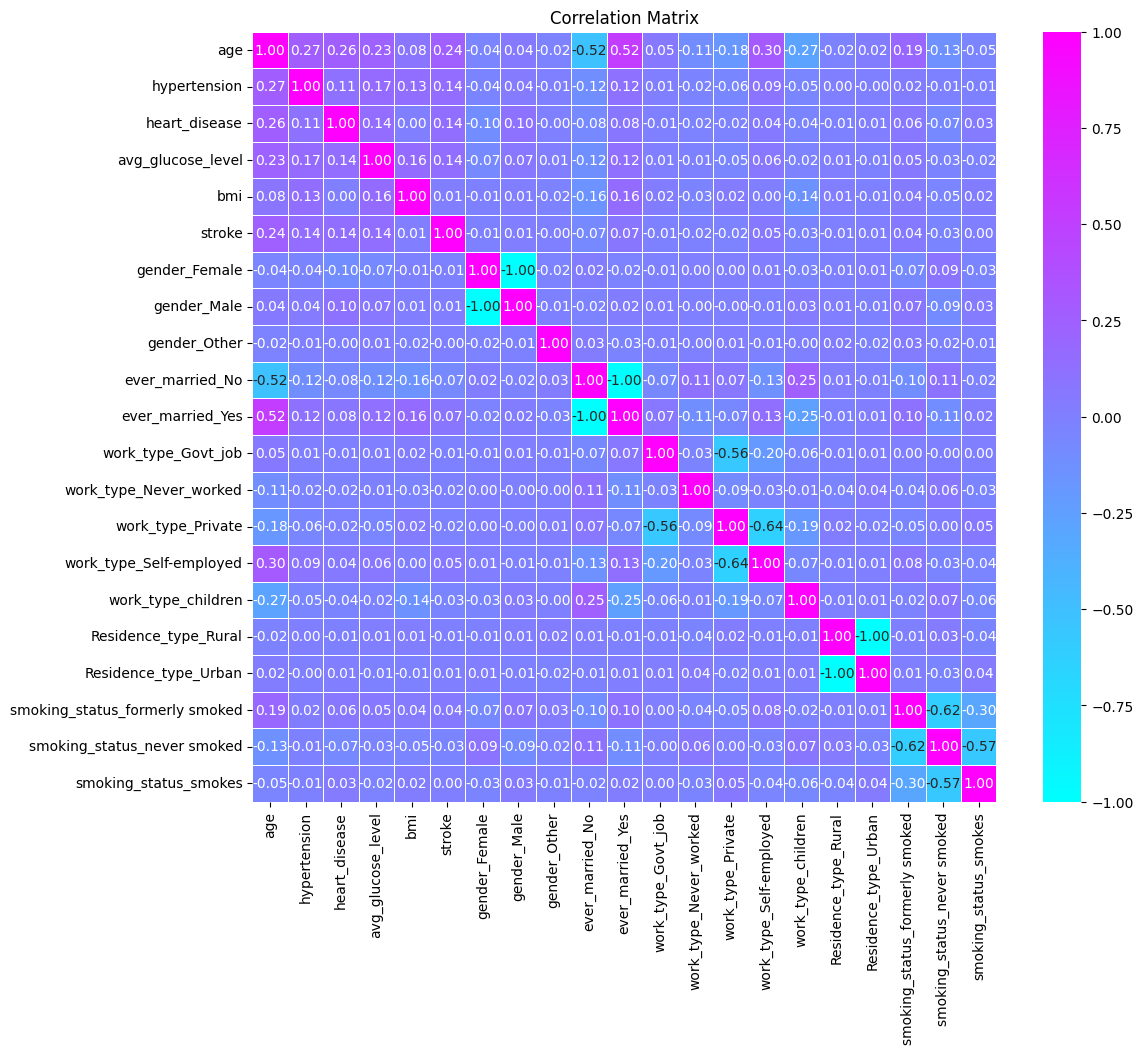

'\n1- strong positive relation\n0- no correlation\n-1- strong negative relation\n'

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=False) #one hot encoding applied. drop_first=false means the first category of the column wont be dropped.

# convert true or false to integer. as integers format is needed to compute the correlation matrix.
data_encoded = data_encoded.astype(int)

# correlation matrix is computed.
correlation_matrix = data_encoded.corr()

# heatmap of correlation matrix is plotted
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='cool', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

"""
1- strong positive relation
0- no correlation
-1- strong negative relation
"""

In [36]:
data_encoded

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
2,80,0,1,105,32,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3,49,0,0,171,34,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,79,1,0,174,24,1,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
5,81,0,0,186,29,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,82,1,0,71,28,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
5102,57,0,0,77,21,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5106,81,0,0,125,40,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
5107,35,0,0,82,30,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0


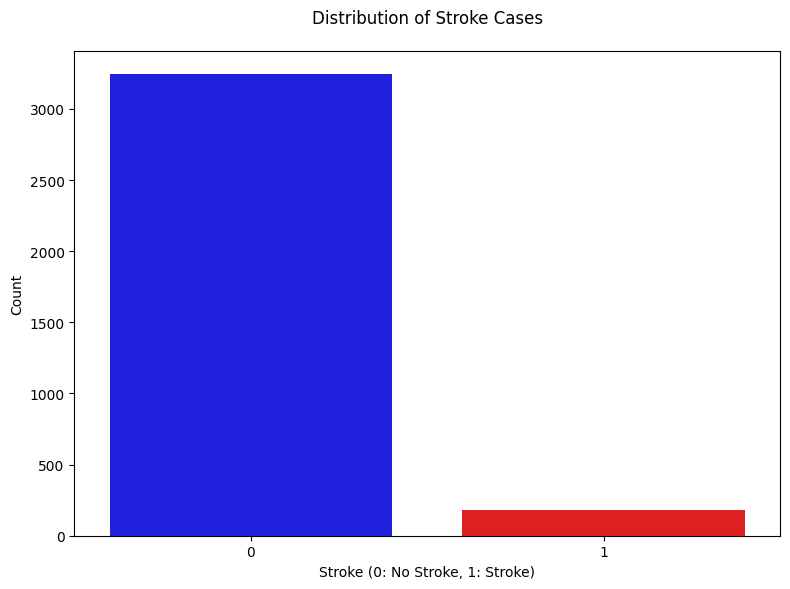

In [37]:
#before balancing data.
plt.figure(figsize=(8, 6))
sns.countplot(data=data_encoded, x='stroke',hue='stroke', palette=['blue', 'red'],legend=False)
plt.title('Distribution of Stroke Cases', pad=20)
plt.xlabel('Stroke (0: No Stroke, 1: Stroke)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [38]:
from imblearn.over_sampling import SMOTE

X = data_encoded.drop(columns=["stroke"])  # Drop target column
y = data_encoded["stroke"]  # Target column

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.90, random_state=42)  #ensures that minority class reaches 90% to the majority class.
X_balanced, y_balanced = smote.fit_resample(X, y) # creates synthetic samples.

# Check the new class distribution
data_balanced = pd.DataFrame(X_balanced, columns=X.columns)
data_balanced['stroke'] = y_balanced


print("\nBalanced class distribution after SMOTE:")
print(data_balanced['stroke'].value_counts())


Balanced class distribution after SMOTE:
stroke
0    3246
1    2921
Name: count, dtype: int64


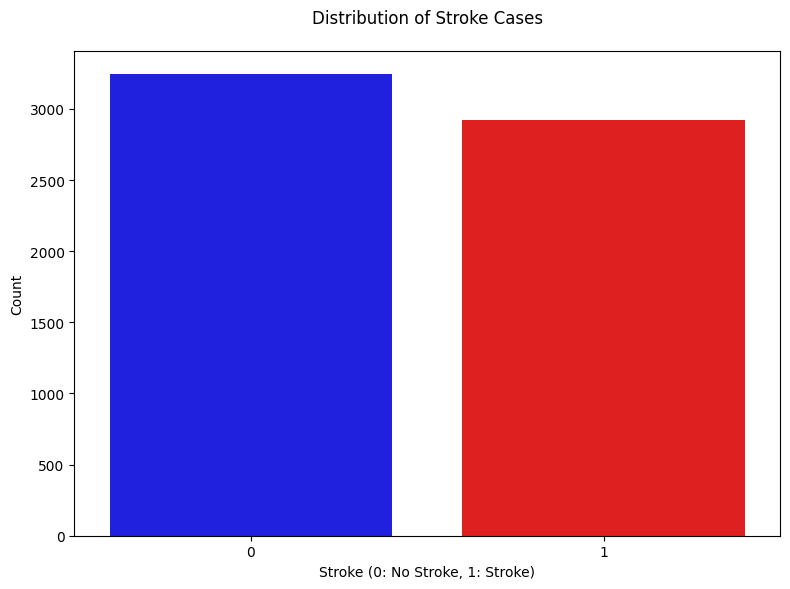

In [39]:
#after balancing with SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(data=data_balanced, x='stroke',hue='stroke', palette=['blue', 'red'],legend=False)
plt.title('Distribution of Stroke Cases', pad=20)
plt.xlabel('Stroke (0: No Stroke, 1: Stroke)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [40]:
data_balanced

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67,0,1,228,36,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,1
1,80,0,1,105,32,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1
2,49,0,0,171,34,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,1
3,79,1,0,174,24,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,1
4,81,0,0,186,29,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,71,0,0,131,28,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6163,67,0,0,137,30,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
6164,35,0,0,79,25,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6165,74,0,1,243,26,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Separate features and target
X = data_balanced.drop('stroke', axis=1)
y = data_balanced['stroke']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=300,max_features=10,random_state=42,bootstrap=True,criterion='entropy',max_depth=10)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9571
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       671
           1       0.98      0.93      0.95       563

    accuracy                           0.96      1234
   macro avg       0.96      0.95      0.96      1234
weighted avg       0.96      0.96      0.96      1234



In [93]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'data' is your pandas DataFrame and 'stroke' is the target column
X = data_balanced.drop('stroke', axis=1)
y = data_balanced['stroke']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.003,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.8768
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       650
           1       0.90      0.83      0.86       584

    accuracy                           0.88      1234
   macro avg       0.88      0.87      0.88      1234
weighted avg       0.88      0.88      0.88      1234



In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam 


# Separate features and target
X = data_balanced.drop('stroke', axis=1).values  # Shape: (6167, 20)
y = data_balanced['stroke'].values               # Shape: (6167,)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for CNN input (samples, timesteps, channels)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # (4933, 20, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)      # (1234, 20, 1)


model = Sequential([
    # First Conv Block
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),
    
    # Second Conv Block
    Conv1D(filters=64, kernel_size=2, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),
    
    # Classifier Head
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # For binary classification
])

optimizer = Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer, 
              loss='binary_crossentropy', 
              metrics=['accuracy', 
                       'AUC',
                       'Precision',
                       'Recall'])

history = model.fit(X_train, y_train,
                    epochs=40,
                    batch_size=32,
                    validation_split=0.2,
                    class_weight={0:1, 1:5})  # Adjust for class imbalance

# Evaluate
test_loss, test_acc, test_auc, test_prec, test_rec = model.evaluate(X_test, y_test)
print(f"Test AUC: {test_auc:.4f}, Accuracy: {test_acc:.4f}")



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - AUC: 0.5302 - Precision: 0.5143 - Recall: 0.7200 - accuracy: 0.5317 - loss: 2.3553 - val_AUC: 0.8992 - val_Precision: 0.5910 - val_Recall: 0.9786 - val_accuracy: 0.6687 - val_loss: 0.6405
Epoch 2/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - AUC: 0.7628 - Precision: 0.5826 - Recall: 0.8955 - accuracy: 0.6409 - loss: 1.4076 - val_AUC: 0.9526 - val_Precision: 0.7104 - val_Recall: 0.9487 - val_accuracy: 0.7923 - val_loss: 0.5298
Epoch 3/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - AUC: 0.8348 - Precision: 0.6332 - Recall: 0.9124 - accuracy: 0.7000 - loss: 1.1826 - val_AUC: 0.9610 - val_Precision: 0.8721 - val_Recall: 0.8889 - val_accuracy: 0.8855 - val_loss: 0.3893
Epoch 4/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - AUC: 0.8691 - Precision: 0.6494 - Recall: 0.9193 - accuracy: 0.7205 - loss: 1.0740 - val_AUC: 0.9692 - val_Precision: 0.9386 - val_Recall: 0.8825 - val_accuracy: 0.9169 - val_loss: 0.2917
Epoch 5/40
124/124 ━━━━━━━━━

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


<Figure size 800x600 with 0 Axes>

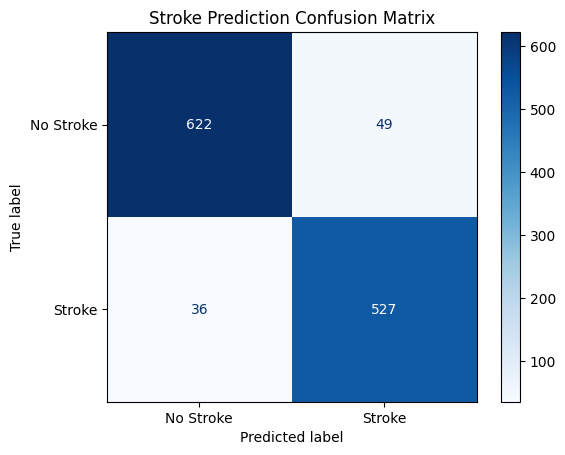

              precision    recall  f1-score   support

   No Stroke       0.95      0.93      0.94       671
      Stroke       0.91      0.94      0.93       563

    accuracy                           0.93      1234
   macro avg       0.93      0.93      0.93      1234
weighted avg       0.93      0.93      0.93      1234



In [115]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import itertools

# Get model predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()
y_true = y_test.values if isinstance(y_test, pd.Series) else y_test

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])
cmd.plot(cmap=plt.cm.Blues)
plt.title("Stroke Prediction Confusion Matrix")
plt.show()

# Print classification metrics
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=["No Stroke", "Stroke"]))


dict_keys(['AUC', 'Precision', 'Recall', 'accuracy', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_accuracy', 'val_loss'])


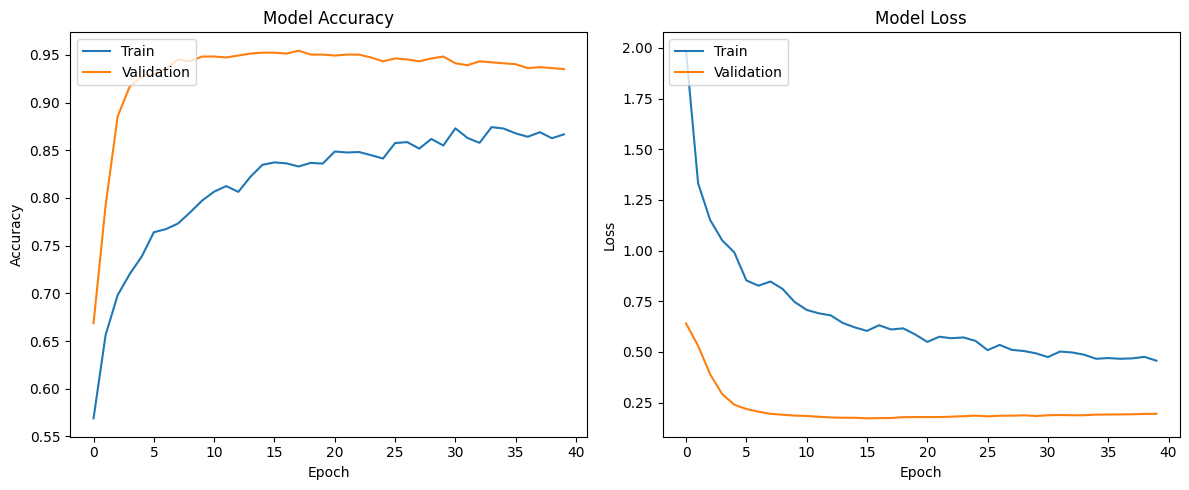

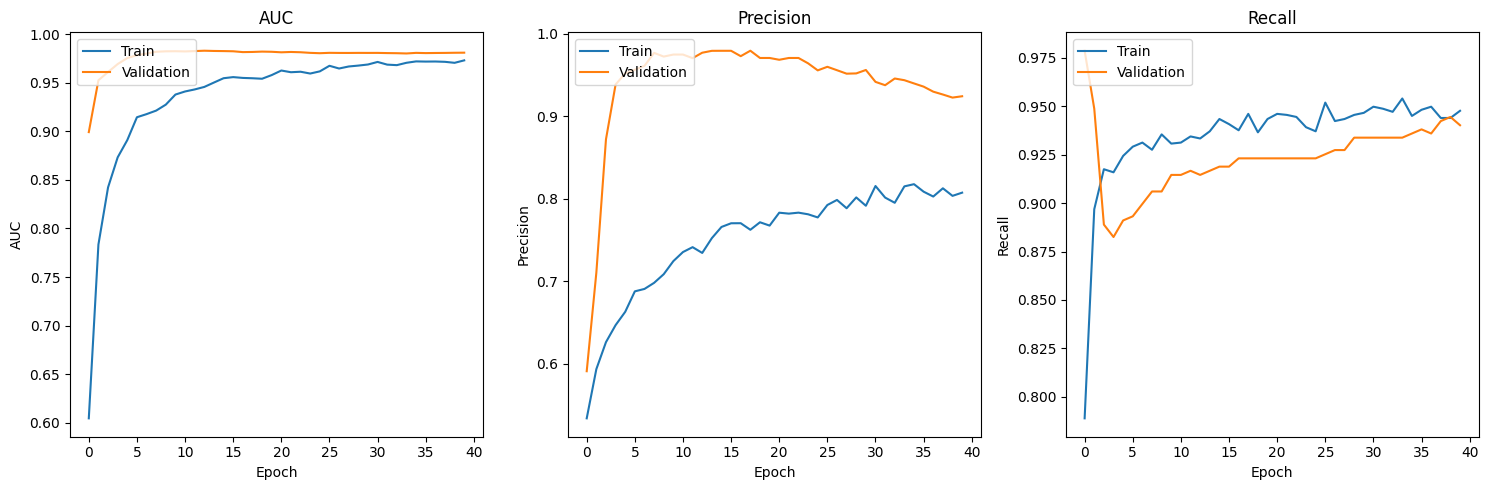

In [116]:
# First, check available metrics in history
print(history.history.keys())

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Additional metrics plots (AUC, Precision, Recall)
plt.figure(figsize=(15, 5))

# AUC plot
plt.subplot(1, 3, 1)
plt.plot(history.history['AUC'])
plt.plot(history.history['val_AUC'])
plt.title('AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Precision plot
plt.subplot(1, 3, 2)
plt.plot(history.history['Precision'])
plt.plot(history.history['val_Precision'])
plt.title('Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Recall plot
plt.subplot(1, 3, 3)
plt.plot(history.history['Recall'])
plt.plot(history.history['val_Recall'])
plt.title('Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
